In [1]:
# BY PESALA NAGA SASHANK 20BCE2153-VIT VELLORE

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#READING THE TITANIC DATA SET and DISPLAY THE DATA SET

data = pd.read_csv("titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


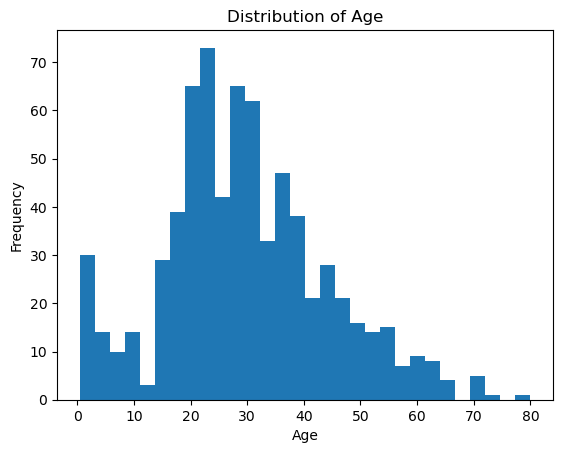

In [10]:
#UNIVARIATE ANALYSIS - BARPLOT
plt.hist(data['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

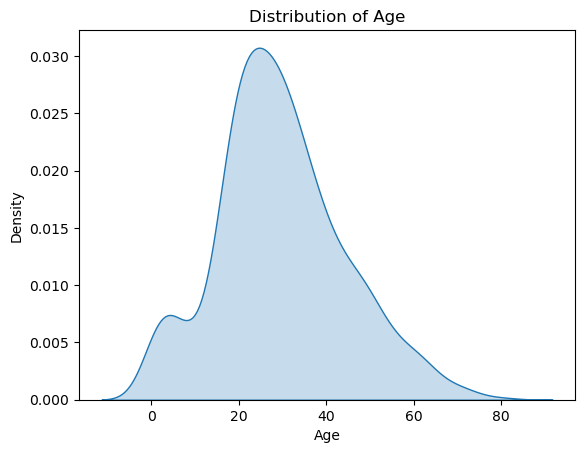

In [14]:
#UNIVARIATE ANALYSIS - KERNEL DENSITY ESTIMATION(KDE)
sns.kdeplot(data['age'], shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.show()

In [19]:
#CENTRAL TENDENCY(MEAN AND MEDIAN) AND SPREAD(STANDARD DEVIATION, MINIMUM AND MAXIMUM)
age_mean = data['age'].mean()
age_median =data['age'].median()
age_std = data['age'].std()
age_min =data['age'].min()
age_max = data['age'].max()

print("Mean Age:", age_mean)
print("Median Age:", age_median)
print("Standard Deviation of Age:", age_std)
print("Minimum Age:", age_min)
print("Maximum Age:", age_max)

Mean Age: 29.69911764705882
Median Age: 28.0
Standard Deviation of Age: 14.526497332334044
Minimum Age: 0.42
Maximum Age: 80.0


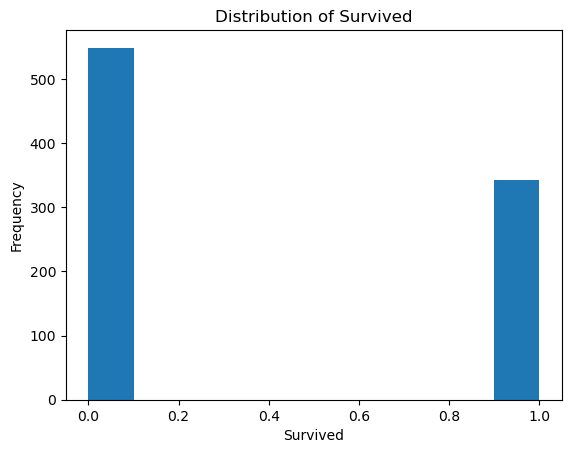

In [24]:
#UNIVARIATE ANALYSIS - BARPLOT
plt.hist(data['survived'])
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Survived')
plt.show()

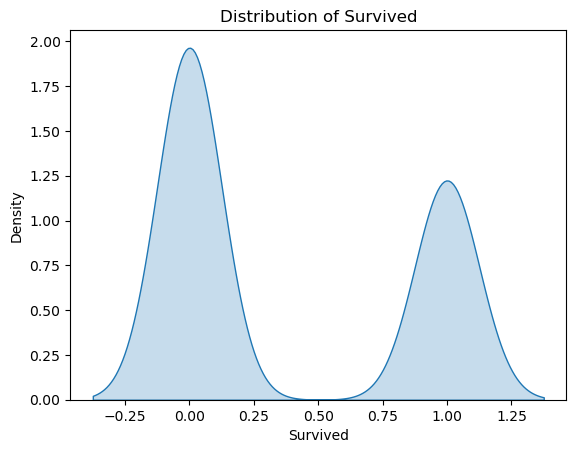

In [25]:
#UNIVARIATE ANALYSIS - KERNEL DENSITY ESTIMATION(KDE)
sns.kdeplot(data['survived'], shade=True)
plt.xlabel('Survived')
plt.ylabel('Density')
plt.title('Distribution of Survived')
plt.show()

In [26]:
#CENTRAL TENDENCY(MEAN AND MEDIAN) AND SPREAD(STANDARD DEVIATION, MINIMUM AND MAXIMUM)
survived_mean = data['survived'].mean()
survived_median =data['survived'].median()
survived_std = data['survived'].std()
survived_min =data['survived'].min()
survived_max = data['survived'].max()

print("Mean Survived:", survived_mean)
print("Median Survived:", survived_median)
print("Standard Deviation of Survived:", survived_std)
print("Minimum Survived:", survived_min)
print("Maximum Survived:", survived_max)

Mean Survived: 0.3838383838383838
Median Survived: 0.0
Standard Deviation of Survived: 0.4865924542648585
Minimum Survived: 0
Maximum Survived: 1


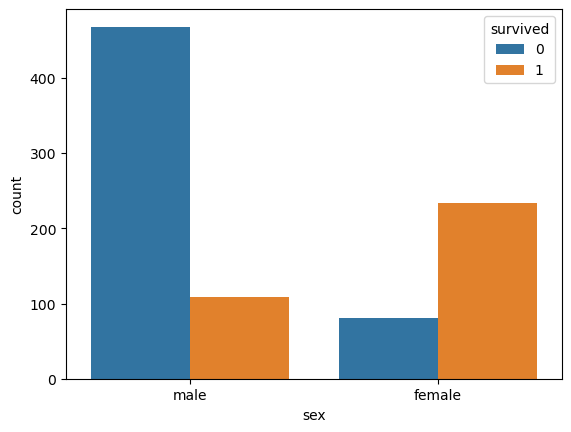

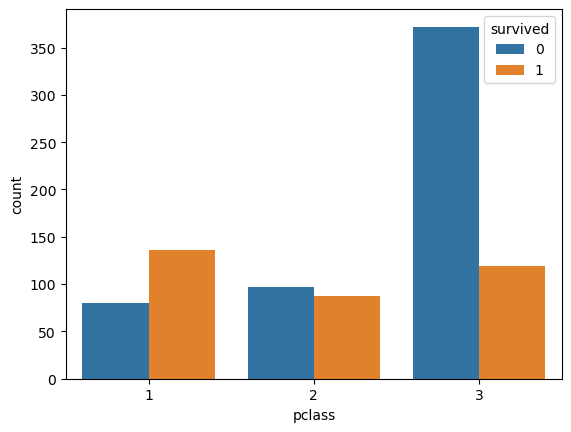

In [30]:
#BIVARIATE ANALYSIS -BARPLOT
sns.countplot(data=data, x="sex", hue="survived")
plt.show()

# Bar plot of survival by passenger class
sns.countplot(data=data, x="pclass", hue="survived")
plt.show()

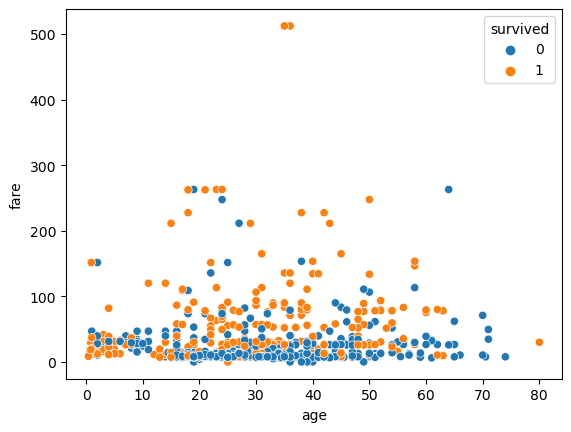

In [31]:
#BIVARIATE ANALYSIS -SCATTERPLOT
# Scatter plot of age vs. fare colored by survival
sns.scatterplot(data=data, x="age", y="fare", hue="survived")
plt.show()

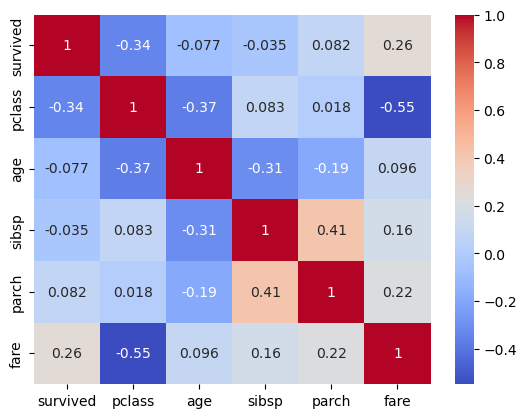

In [35]:
#BIVARIATE ANALYSIS - HEATMAP
columns_of_interest = ["survived", "pclass", "age","sibsp","parch", "fare"]
corr_matrix = data[columns_of_interest].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


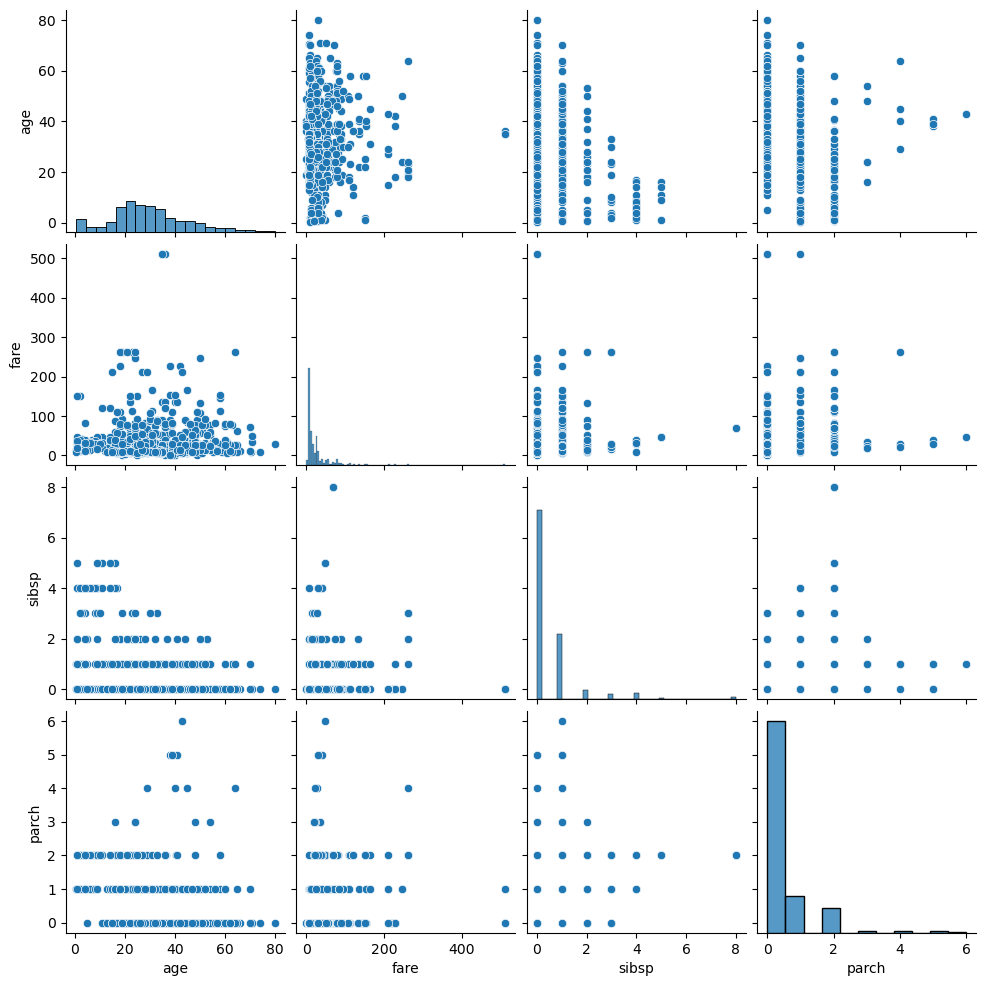

In [37]:
#MULTIVARIATE ANALYSIS - SCATTERPLOT MATRIX
numerical_features = ['age', 'fare', 'sibsp', 'parch']

# Create scatter plot matrix
sns.pairplot(data[numerical_features])
plt.show()

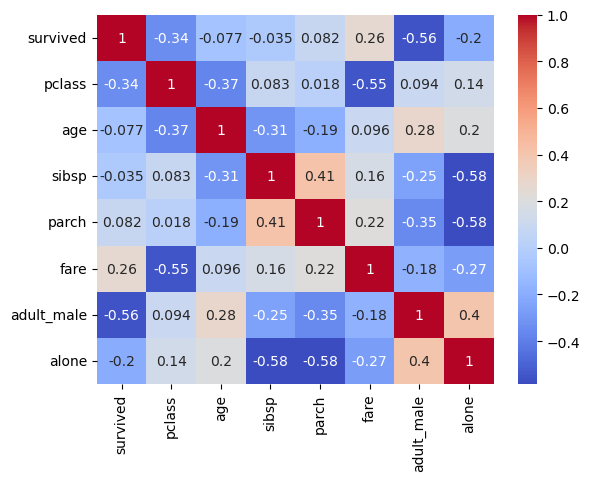

In [38]:
#MULTIVARIATE ANALYSIS - HEATMAP
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

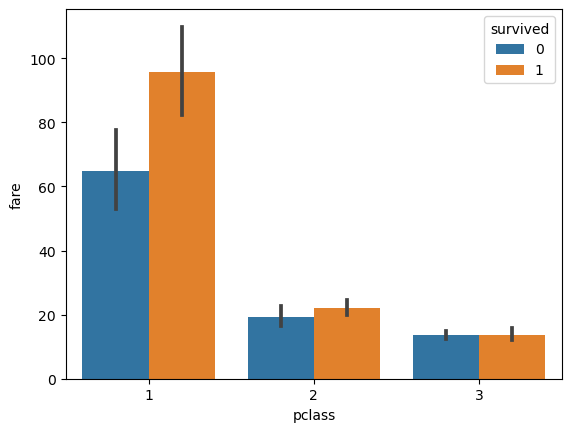

In [39]:
#MULTIVARIATE ANALYSIS - STACKED BARPLOT
sns.barplot(x='pclass', y='fare', hue='survived', data=data)
plt.show()

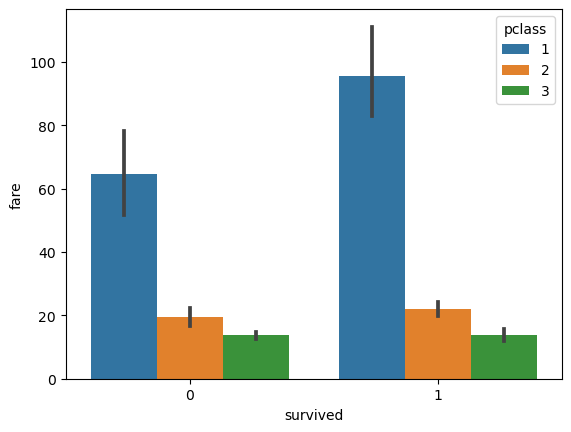

In [42]:
#MULTIVARIATE ANALYSIS - GROUPED BAR PLOT
sns.barplot(x='survived', y='fare', hue='pclass', data=data)
plt.show()

In [45]:
#DESCRIPTIVE STATISTICS
numerical_features = ['age', 'fare', 'sibsp', 'parch']
numerical_stats = data[numerical_features].describe()
print("Descriptive Statistics for Numerical Features:")
print(numerical_stats)
print()

categorical_features = ['pclass', 'sex', 'embarked']
categorical_counts = {}
for feature in categorical_features:
    categorical_counts[feature] = data[feature].value_counts()
print("Frequency Count for Categorical Features:")
for feature, counts in categorical_counts.items():
    print(f"\n{feature.capitalize()}:\n{counts}")  

Descriptive Statistics for Numerical Features:
              age        fare       sibsp       parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000

Frequency Count for Categorical Features:

Pclass:
3    491
1    216
2    184
Name: pclass, dtype: int64

Sex:
male      577
female    314
Name: sex, dtype: int64

Embarked:
S    644
C    168
Q     77
Name: embarked, dtype: int64


In [49]:
#Handle the Missing values
print("Missing Values:")
print(data.isnull().sum())
print()

data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna('Unknown', inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

print("Missing Values after Handling:")
print(data.isnull().sum())

Missing Values:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values after Handling:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [52]:
#Find the outliers and replace the outliers
numerical_features = ['age', 'fare', 'sibsp', 'parch']

z_threshold = 3
for feature in numerical_features:
    z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
    data[feature] = np.where(z_scores > z_threshold, data[feature].median(), data[feature])

iqr_threshold = 1.5   
for feature in numerical_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr_threshold * iqr)
    upper_bound = q3 + (iqr_threshold * iqr)
    data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound), data[feature].median(), data[feature])

print("Outliers after Replacement:")
for feature in numerical_features:
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")


Outliers after Replacement:
age: 891 outliers
fare: 876 outliers
sibsp: 237 outliers
parch: 0 outliers


In [53]:
#Check for Categorical columns and perform encoding.

categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)
print()

df_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print("Encoded DataFrame:")
print(df_encoded.head())

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoded DataFrame:
   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0    1.0    0.0   7.2500        True  False         1   
1         1       1  38.0    1.0    0.0  14.4542       False  False         0   
2         1       3  26.0    0.0    0.0   7.9250       False   True         0   
3         1       1  35.0    1.0    0.0  53.1000       False  False         0   
4         0       3  35.0    0.0    0.0   8.0500        True   True         1   

   embarked_Q  ...  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0  ...          0       0       0       0       0       0       0   
1           0  ...          1       0       1       0       0       0       0   
2           0  ...          1       0       0       0       0       0       0   
3           0  ...          1       0       1       0    

In [54]:
# Split the data into dependent and independent variables
X = data.drop("survived", axis=1)  # Independent variables
y = data["survived"]  # Dependent variable
print("Independent Variables (X):")
print(X.head())
print()

print("Dependent Variable (y):")
print(y.head())

Independent Variables (X):
   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0    1.0    0.0   7.2500        S  Third    man   
1       1  female  38.0    1.0    0.0  14.4542        C  First  woman   
2       3  female  26.0    0.0    0.0   7.9250        S  Third  woman   
3       1  female  35.0    1.0    0.0  53.1000        S  First  woman   
4       3    male  35.0    0.0    0.0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  

Dependent Variable (y):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [57]:
#Scale the independent variables
from sklearn.preprocessing import StandardScaler
X = data.drop("survived", axis=1)  # Independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Independent Variables:")
print(df_scaled.head())

ValueError: could not convert string to float: 'male'

In [58]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set:")
print(X_train.head())
print(y_train.head())
print()

print("Testing Set:")
print(X_test.head())
print(y_test.head())

Training Set:
     pclass     sex   age  sibsp  parch     fare embarked   class    who  \
331       1    male  45.5    0.0    0.0  28.5000        S   First    man   
733       2    male  23.0    0.0    0.0  13.0000        S  Second    man   
382       3    male  32.0    0.0    0.0   7.9250        S   Third    man   
704       3    male  26.0    1.0    0.0   7.8542        S   Third    man   
813       3  female   6.0    0.0    0.0  31.2750        S   Third  child   

     adult_male deck  embark_town alive  alone  
331        True    C  Southampton    no   True  
733        True  NaN  Southampton    no   True  
382        True  NaN  Southampton    no   True  
704        True  NaN  Southampton    no  False  
813       False  NaN  Southampton    no  False  
331    0
733    0
382    0
704    0
813    0
Name: survived, dtype: int64

Testing Set:
     pclass     sex   age  sibsp  parch     fare embarked   class    who  \
709       3    male  28.0    1.0    0.0  15.2458        C   Third    ma